## Sruthy B

# Prediction using unsupervised learning

### Task: Predict the optimum number of clusters for the given dataset and represent it visually.

Clustering is a technique used to seperate data into clusters. It helps to identify meaningfulness and usefulness of a data.There are many clustering algorithms for performing clustering.

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up (Agglomerative clustering ) or a top-down approach(Divisive clustering). These methods produce a tree-based hierarchy of points called a dendrogram.

The k-means clustering is used to identify clusters of data objects in a dataset. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose.The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. 

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
from sklearn.cluster import KMeans

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.set_index("Id", inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


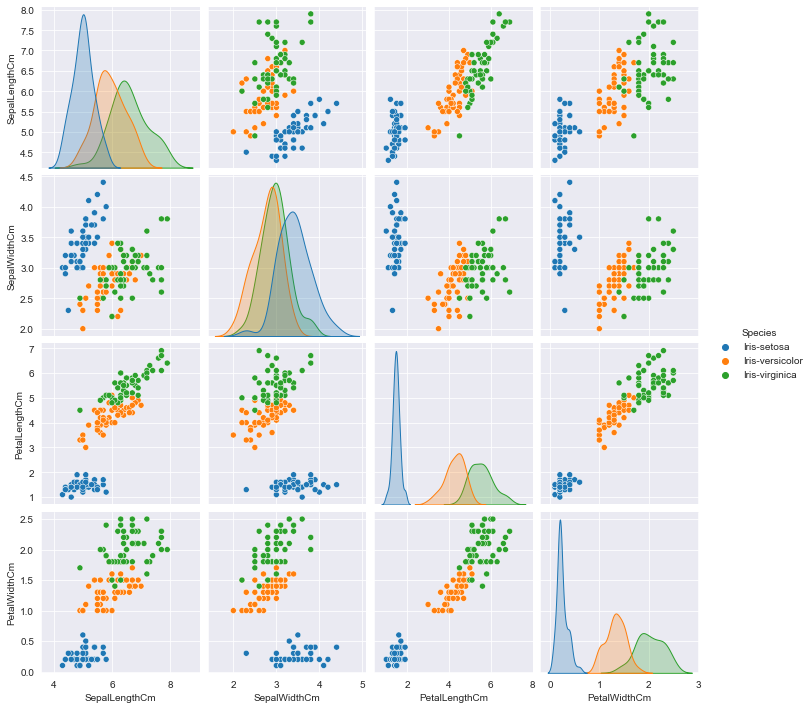

In [7]:
sns.pairplot(df, hue='Species', height=2.5);

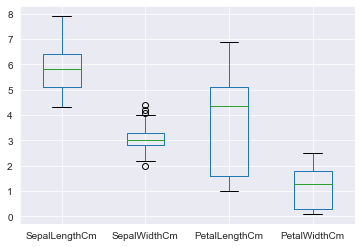

In [8]:
df.boxplot();

In [9]:
df1 = df.iloc[:, [0, 1, 2, 3]].values

680.8243999999996
152.36870647733915
78.94084142614601
57.34492380952378
46.56163015873017
38.930963049671746
34.46400663145227
29.90685675596547
28.17047422606632
26.350458353050467


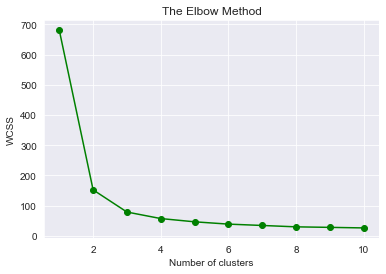

In [10]:
#using elbow method to find optimum number of clusters for KMeans clustering
wcss = []
for k in range (1,11):
    model = KMeans(n_clusters = k)
    model.fit(df1)
    wcss.append(model.inertia_)
    print(model.inertia_)
    
plt.plot(range(1,11),wcss,'-o',c='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### From above graph, we can choose number of clusters = 3, where elbow occurs.

In [11]:
# fitting KMeans classifier to data
model_k = KMeans(n_clusters=3)
model_k.fit(df1)
labels_k =model_k.predict(df1)   
print(labels_k)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
from sklearn.metrics  import silhouette_score
score = silhouette_score(df1, labels_k, metric = 'euclidean')
print('Silhouette Score for KMC: %.4f' % score)

Silhouette Score for KMC: 0.5526


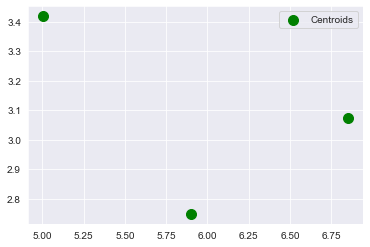

In [13]:
#plotting centroids of clusters
plt.scatter(model_k.cluster_centers_[:, 0], model_k.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

### Plotting Clusters

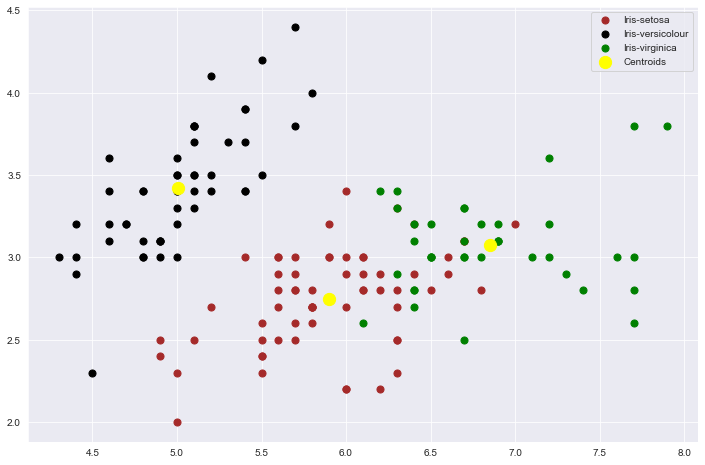

In [14]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (12,8))
plt.scatter(df1[labels_k == 0, 0], df1[labels_k == 0, 1], s = 50, c = 'brown', label = 'Iris-setosa')
plt.scatter(df1[labels_k == 1, 0], df1[labels_k == 1, 1], s = 50, c = 'black',   label = 'Iris-versicolour')
plt.scatter(df1[labels_k == 2, 0], df1[labels_k == 2, 1], s = 50, c = 'green',  label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model_k.cluster_centers_[:, 0], model_k.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

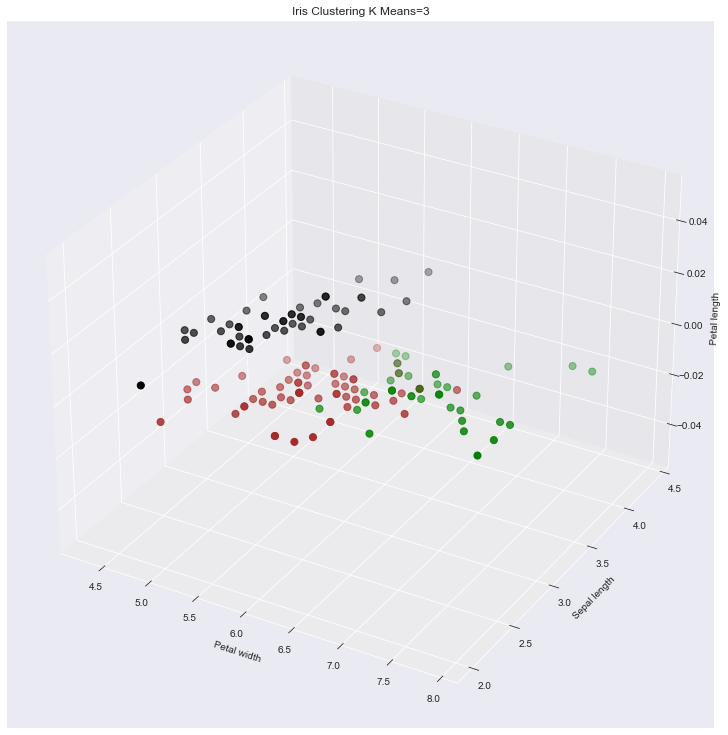

In [15]:
# 3d scatterplot using matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,13))
#ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1[labels_k == 0, 0], df1[labels_k == 0, 1], s = 50, c = 'brown', label = 'Iris-setosa')
ax.scatter(df1[labels_k == 1, 0], df1[labels_k == 1, 1], s = 50, c = 'black',   label = 'Iris-versicolour')
ax.scatter(df1[labels_k == 2, 0], df1[labels_k == 2, 1], s = 50, c = 'green',  label = 'Iris-virginica')

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=12)
plt.show()